## Importing Libraries

In [1224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Optional but powerful

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [1225]:
import os


In [1226]:
os.getcwd()

'c:\\Users\\deela\\Downloads\\Data\\Python\\Delay Analysis'

In [1227]:
#loading the dataset

cwd = os.getcwd()

df = pd.read_csv(cwd + "\\Construction projects.csv", encoding="ISO-8859-1")

### Data Cleaning

In [1228]:
df.head(5)

,Unnamed: 0,Project Geographic District,Project Building Identifier,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Phase Actual Start Date,Project Phase Planned End Date,Project Phase Actual End Date,Project Budget Amount Clean,Final Estimate of Actual Costs Through End of Phase Amount,Total Phase Actual Spending Amount
0,3,1,M019,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Scope,Complete,2021-04-13,2021-09-13,2021-07-01,68660.0,76648.0,76648.0
1,4,1,M019,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Design,Complete,2021-07-06,2021-12-07,2021-11-29,343300.0,385777.0,332314.0
2,5,1,M019,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Construction,In-Progress,2022-07-18,2024-07-16,NaN,7724250.0,7190070.0,6223204.0
3,6,1,M019,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,"CM,F&E",In-Progress,2022-07-18,2024-07-16,NaN,480620.0,211172.0,210807.0
4,7,1,M019,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Scope,Complete,2023-06-22,2023-10-23,2023-07-06,4240.0,2496.0,2496.0


In [1229]:
df.tail(5)

,Unnamed: 0,Project Geographic District,Project Building Identifier,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Phase Actual Start Date,Project Phase Planned End Date,Project Phase Actual End Date,Project Budget Amount Clean,Final Estimate of Actual Costs Through End of Phase Amount,Total Phase Actual Spending Amount
8862,14088,32,KBRV,BETHESDA DAY CARE CENTER OF BROOKLYN,SCA CIP,ACS EARLY LEARN LEASE IMPROVEMENT,"CM,F&E",PNS,NaN,NaN,NaN,27111.0,27111.0,19411.0
8863,14089,32,KBSG,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,Scope,Complete,2021-04-12,2021-08-11,2021-07-19,4950.0,15471.0,15471.0
8864,14090,32,KBSG,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,Design,Complete,2022-01-03,2022-05-03,2023-01-06,22277.0,29044.0,29044.0
8865,14091,32,KBSG,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,Construction,PNS,NaN,NaN,NaN,287121.0,287121.0,26649.0
8866,14092,32,KBSG,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,"CM,F&E",PNS,NaN,NaN,NaN,53216.0,53216.0,7173.0


In [1230]:
# Dropping only rows where any of the critical date columns are missing

df_new = df.dropna(subset=[
    'Project Phase Actual Start Date',
    'Project Phase Planned End Date',
    'Project Phase Actual End Date'
])


In [1231]:
df_new = df_new.rename(columns={'Project Phase Actual Start Date': 'Project Actual Start Date',
                                'Project Phase Planned End Date': 'Project Planned End Date',
                                'Project Phase Actual End Date': 'Project Actual End Date',
                                'Project Budget Amount Clean': 'Budget',
                                'Final Estimate of Actual Costs Through End of Phase Amount': 'Final_Estimate',
                                'Total Phase Actual Spending Amount': 'Actual_Spend'})    

In [1232]:
df_new.head(5)

,Unnamed: 0,Project Geographic District,Project Building Identifier,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Actual Start Date,Project Planned End Date,Project Actual End Date,Budget,Final_Estimate,Actual_Spend
0,3,1,M019,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Scope,Complete,2021-04-13,2021-09-13,2021-07-01,68660.0,76648.0,76648.0
1,4,1,M019,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Design,Complete,2021-07-06,2021-12-07,2021-11-29,343300.0,385777.0,332314.0
4,7,1,M019,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Scope,Complete,2023-06-22,2023-10-23,2023-07-06,4240.0,2496.0,2496.0
5,8,1,M019,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Design,Complete,2023-07-06,2024-01-03,2023-12-13,19080.0,9986.0,9986.0
8,13,1,M020,P.S. 20 - MANHATTAN,SCA CIP,ROOFS / WINDOWS / SECURITY LIGHTING / EXTERIOR...,Scope,Complete,2021-05-26,2021-10-12,2022-01-21,124674.0,160838.0,160838.0


In [1233]:
df_new.shape

(3551, 14)

In [1234]:
df_new.columns = df_new.columns.str.strip()


In [1235]:
df_new = df_new.drop(columns=['Unnamed: 0', 'Project Building Identifier'])

In [1236]:
df_new

,Project Geographic District,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Actual Start Date,Project Planned End Date,Project Actual End Date,Budget,Final_Estimate,Actual_Spend
0,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Scope,Complete,2021-04-13,2021-09-13,2021-07-01,68660.0,76648.0,76648.0
1,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Design,Complete,2021-07-06,2021-12-07,2021-11-29,343300.0,385777.0,332314.0
4,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Scope,Complete,2023-06-22,2023-10-23,2023-07-06,4240.0,2496.0,2496.0
5,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Design,Complete,2023-07-06,2024-01-03,2023-12-13,19080.0,9986.0,9986.0
8,1,P.S. 20 - MANHATTAN,SCA CIP,ROOFS / WINDOWS / SECURITY LIGHTING / EXTERIOR...,Scope,Complete,2021-05-26,2021-10-12,2022-01-21,124674.0,160838.0,160838.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8857,32,EBC HS FOR PUB. SERV. - BUSHWICK-K,SCA CIP,IPDVS INSTALLATIONS,Construction,Complete,2023-09-27,2024-08-21,2024-12-06,273760.0,246203.0,155334.0
8858,32,EBC HS FOR PUB. SERV. - BUSHWICK-K,SCA CIP,IPDVS INSTALLATIONS,"CM,F&E",Complete,2023-09-27,2024-08-21,2024-12-06,113730.0,95616.0,94838.0
8859,32,BETHESDA DAY CARE CENTER OF BROOKLYN,SCA CIP,ACS EARLY LEARN LEASE IMPROVEMENT,Scope,Complete,2021-04-08,2021-08-09,2021-07-19,2522.0,13929.0,13929.0
8863,32,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,Scope,Complete,2021-04-12,2021-08-11,2021-07-19,4950.0,15471.0,15471.0


In [1237]:
df_new['Project Type'].unique()

array(['SCA CIP', 'SCA CIP RESOA', 'SCA Capacity', '3K',
       'SCA Lease Site Improvement', 'SCA Emergency Lighting', 'PRE-K'],
      dtype=object)

In [1238]:
df_new['Project Phase Name'].unique()


array(['Scope', 'Design', 'Construction', 'CM,F&E', 'CM,Art,F&E'],
      dtype=object)

In [1239]:
print(df_new.columns.tolist())


['Project Geographic District', 'Project School Name', 'Project Type', 'Project Description', 'Project Phase Name', 'Project Status Name', 'Project Actual Start Date', 'Project Planned End Date', 'Project Actual End Date', 'Budget', 'Final_Estimate', 'Actual_Spend']


In [1240]:
df_new['Project School Name'].unique()


array(['P.S. 19 - MANHATTAN', 'P.S. 20 - MANHATTAN',
       'NEW EXPLORATIONS - M', ..., 'EBC HS FOR PUB. SERV. - BUSHWICK-K',
       'BETHESDA DAY CARE CENTER OF BROOKLYN',
       '200 CENTRAL AVENUE DAY CARE CENTER'], dtype=object)

In [1241]:
df_new['Project Actual Start Date'] = pd.to_datetime(df_new['Project Actual Start Date'], errors='coerce')
df_new['Project Planned End Date'] = pd.to_datetime(df_new['Project Planned End Date'], errors='coerce')
df_new['Project Actual End Date'] = pd.to_datetime(df_new['Project Actual End Date'], errors='coerce')

In [1242]:
df_new

,Project Geographic District,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Actual Start Date,Project Planned End Date,Project Actual End Date,Budget,Final_Estimate,Actual_Spend
0,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Scope,Complete,2021-04-13,2021-09-13,2021-07-01,68660.0,76648.0,76648.0
1,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Design,Complete,2021-07-06,2021-12-07,2021-11-29,343300.0,385777.0,332314.0
4,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Scope,Complete,2023-06-22,2023-10-23,2023-07-06,4240.0,2496.0,2496.0
5,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Design,Complete,2023-07-06,2024-01-03,2023-12-13,19080.0,9986.0,9986.0
8,1,P.S. 20 - MANHATTAN,SCA CIP,ROOFS / WINDOWS / SECURITY LIGHTING / EXTERIOR...,Scope,Complete,2021-05-26,2021-10-12,2022-01-21,124674.0,160838.0,160838.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8857,32,EBC HS FOR PUB. SERV. - BUSHWICK-K,SCA CIP,IPDVS INSTALLATIONS,Construction,Complete,2023-09-27,2024-08-21,2024-12-06,273760.0,246203.0,155334.0
8858,32,EBC HS FOR PUB. SERV. - BUSHWICK-K,SCA CIP,IPDVS INSTALLATIONS,"CM,F&E",Complete,2023-09-27,2024-08-21,2024-12-06,113730.0,95616.0,94838.0
8859,32,BETHESDA DAY CARE CENTER OF BROOKLYN,SCA CIP,ACS EARLY LEARN LEASE IMPROVEMENT,Scope,Complete,2021-04-08,2021-08-09,2021-07-19,2522.0,13929.0,13929.0
8863,32,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,Scope,Complete,2021-04-12,2021-08-11,2021-07-19,4950.0,15471.0,15471.0


In [1243]:
df_new['Planned_Duration'] = (df_new['Project Planned End Date'] - df_new['Project Actual Start Date']).dt.days
df_new['Actual_Duration'] = (df_new['Project Actual End Date'] - df_new['Project Actual Start Date']).dt.days


In [1244]:
df_new.tail(5)

,Project Geographic District,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Actual Start Date,Project Planned End Date,Project Actual End Date,Budget,Final_Estimate,Actual_Spend,Planned_Duration,Actual_Duration
8857,32,EBC HS FOR PUB. SERV. - BUSHWICK-K,SCA CIP,IPDVS INSTALLATIONS,Construction,Complete,2023-09-27,2024-08-21,2024-12-06,273760.0,246203.0,155334.0,329,436
8858,32,EBC HS FOR PUB. SERV. - BUSHWICK-K,SCA CIP,IPDVS INSTALLATIONS,"CM,F&E",Complete,2023-09-27,2024-08-21,2024-12-06,113730.0,95616.0,94838.0,329,436
8859,32,BETHESDA DAY CARE CENTER OF BROOKLYN,SCA CIP,ACS EARLY LEARN LEASE IMPROVEMENT,Scope,Complete,2021-04-08,2021-08-09,2021-07-19,2522.0,13929.0,13929.0,123,102
8863,32,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,Scope,Complete,2021-04-12,2021-08-11,2021-07-19,4950.0,15471.0,15471.0,121,98
8864,32,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,Design,Complete,2022-01-03,2022-05-03,2023-01-06,22277.0,29044.0,29044.0,120,368


In [1245]:
df_new['Project Start_Month'] = df_new['Project Actual Start Date'].dt.month_name()


In [1246]:
df_new

,Project Geographic District,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Actual Start Date,Project Planned End Date,Project Actual End Date,Budget,Final_Estimate,Actual_Spend,Planned_Duration,Actual_Duration,Project Start_Month
0,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Scope,Complete,2021-04-13,2021-09-13,2021-07-01,68660.0,76648.0,76648.0,153,79,April
1,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Design,Complete,2021-07-06,2021-12-07,2021-11-29,343300.0,385777.0,332314.0,154,146,July
4,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Scope,Complete,2023-06-22,2023-10-23,2023-07-06,4240.0,2496.0,2496.0,123,14,June
5,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Design,Complete,2023-07-06,2024-01-03,2023-12-13,19080.0,9986.0,9986.0,181,160,July
8,1,P.S. 20 - MANHATTAN,SCA CIP,ROOFS / WINDOWS / SECURITY LIGHTING / EXTERIOR...,Scope,Complete,2021-05-26,2021-10-12,2022-01-21,124674.0,160838.0,160838.0,139,240,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,32,EBC HS FOR PUB. SERV. - BUSHWICK-K,SCA CIP,IPDVS INSTALLATIONS,Construction,Complete,2023-09-27,2024-08-21,2024-12-06,273760.0,246203.0,155334.0,329,436,September
8858,32,EBC HS FOR PUB. SERV. - BUSHWICK-K,SCA CIP,IPDVS INSTALLATIONS,"CM,F&E",Complete,2023-09-27,2024-08-21,2024-12-06,113730.0,95616.0,94838.0,329,436,September
8859,32,BETHESDA DAY CARE CENTER OF BROOKLYN,SCA CIP,ACS EARLY LEARN LEASE IMPROVEMENT,Scope,Complete,2021-04-08,2021-08-09,2021-07-19,2522.0,13929.0,13929.0,123,102,April
8863,32,200 CENTRAL AVENUE DAY CARE CENTER,SCA CIP,ACS EARLY LEARN LEASE RENEWAL,Scope,Complete,2021-04-12,2021-08-11,2021-07-19,4950.0,15471.0,15471.0,121,98,April


In [1247]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'


In [1248]:
df_new['Start_Season'] = df_new['Project Actual Start Date'].dt.month.apply(get_season)

In [1249]:
df_new.head(5)

,Project Geographic District,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Actual Start Date,Project Planned End Date,Project Actual End Date,Budget,Final_Estimate,Actual_Spend,Planned_Duration,Actual_Duration,Project Start_Month,Start_Season
0,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Scope,Complete,2021-04-13,2021-09-13,2021-07-01,68660.0,76648.0,76648.0,153,79,April,Spring
1,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Design,Complete,2021-07-06,2021-12-07,2021-11-29,343300.0,385777.0,332314.0,154,146,July,Summer
4,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Scope,Complete,2023-06-22,2023-10-23,2023-07-06,4240.0,2496.0,2496.0,123,14,June,Summer
5,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Design,Complete,2023-07-06,2024-01-03,2023-12-13,19080.0,9986.0,9986.0,181,160,July,Summer
8,1,P.S. 20 - MANHATTAN,SCA CIP,ROOFS / WINDOWS / SECURITY LIGHTING / EXTERIOR...,Scope,Complete,2021-05-26,2021-10-12,2022-01-21,124674.0,160838.0,160838.0,139,240,May,Spring


In [1250]:
df_new['Is_Delayed'] = (df_new['Project Actual End Date'] > df_new['Project Planned End Date']).astype(int)


In [1251]:
df_new.head(5)

,Project Geographic District,Project School Name,Project Type,Project Description,Project Phase Name,Project Status Name,Project Actual Start Date,Project Planned End Date,Project Actual End Date,Budget,Final_Estimate,Actual_Spend,Planned_Duration,Actual_Duration,Project Start_Month,Start_Season,Is_Delayed
0,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Scope,Complete,2021-04-13,2021-09-13,2021-07-01,68660.0,76648.0,76648.0,153,79,April,Spring,0
1,1,P.S. 19 - MANHATTAN,SCA CIP,PLANYC BOILER CONVERSION / PLANYC CLIMATE CONTROL,Design,Complete,2021-07-06,2021-12-07,2021-11-29,343300.0,385777.0,332314.0,154,146,July,Summer,0
4,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Scope,Complete,2023-06-22,2023-10-23,2023-07-06,4240.0,2496.0,2496.0,123,14,June,Summer,0
5,1,P.S. 19 - MANHATTAN,SCA CIP,IPDVS CAMERA INSTALLATION,Design,Complete,2023-07-06,2024-01-03,2023-12-13,19080.0,9986.0,9986.0,181,160,July,Summer,0
8,1,P.S. 20 - MANHATTAN,SCA CIP,ROOFS / WINDOWS / SECURITY LIGHTING / EXTERIOR...,Scope,Complete,2021-05-26,2021-10-12,2022-01-21,124674.0,160838.0,160838.0,139,240,May,Spring,1


In [1252]:
df_new['Is_Delayed'].value_counts()


Is_Delayed
0    1830
1    1721
Name: count, dtype: int64

In [1253]:

df_new['Estimate_Ratio'] = df_new['Final_Estimate'] / df_new['Budget']
df_new['Budget_Per_Day'] = df_new['Budget'] / df_new['Planned_Duration']


## EDA


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'SCA CIP'),
  Text(1, 0, 'SCA CIP RESOA'),
  Text(2, 0, 'SCA Capacity'),
  Text(3, 0, '3K'),
  Text(4, 0, 'SCA Lease Site Improvement'),
  Text(5, 0, 'SCA Emergency Lighting'),
  Text(6, 0, 'PRE-K')])

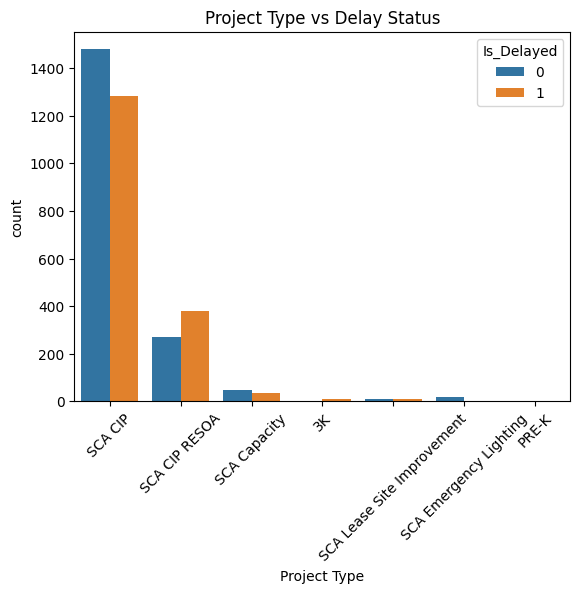

In [1254]:
sns.countplot(data=df_new, x='Project Type', hue='Is_Delayed')
plt.title('Project Type vs Delay Status')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Scope'),
  Text(1, 0, 'Design'),
  Text(2, 0, 'Construction'),
  Text(3, 0, 'CM,F&E'),
  Text(4, 0, 'CM,Art,F&E')])

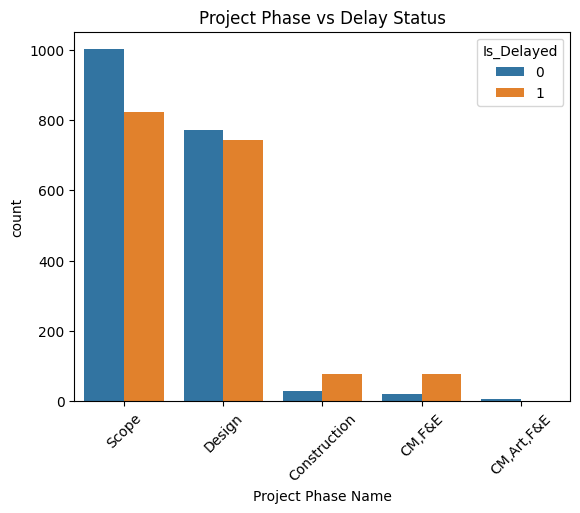

In [1255]:
sns.countplot(data=df_new, x='Project Phase Name', hue='Is_Delayed')
plt.title('Project Phase vs Delay Status')
plt.xticks(rotation=45)

<Figure size 1200x600 with 0 Axes>

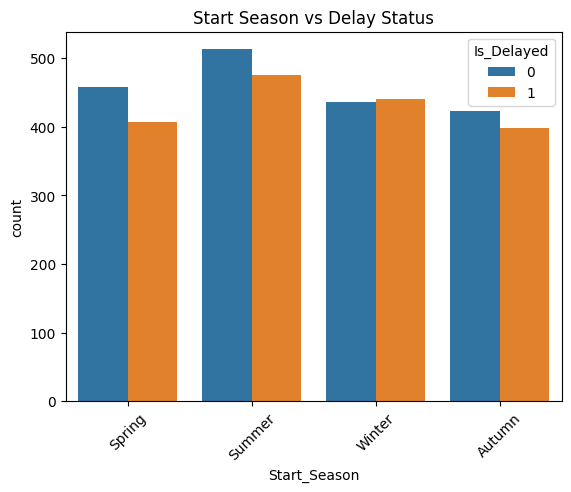

<Figure size 1200x600 with 0 Axes>

In [1256]:
sns.countplot(data=df_new, x='Start_Season', hue='Is_Delayed')
plt.title('Start Season vs Delay Status')
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

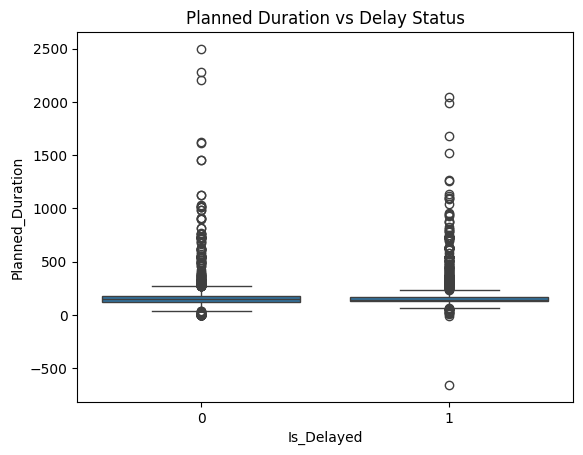

<Figure size 1200x600 with 0 Axes>

In [1257]:
sns.boxplot(data=df_new, x='Is_Delayed', y='Planned_Duration')
plt.title('Planned Duration vs Delay Status')
plt.figure(figsize=(12, 6))

<Axes: xlabel='Planned_Duration', ylabel='Actual_Duration'>

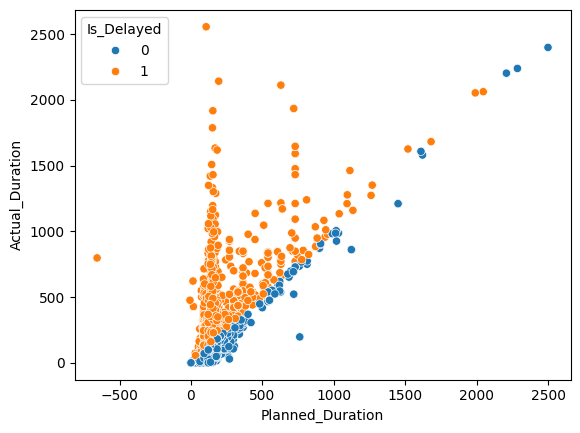

In [1258]:
sns.scatterplot(data=df_new, x='Planned_Duration', y='Actual_Duration', hue='Is_Delayed')


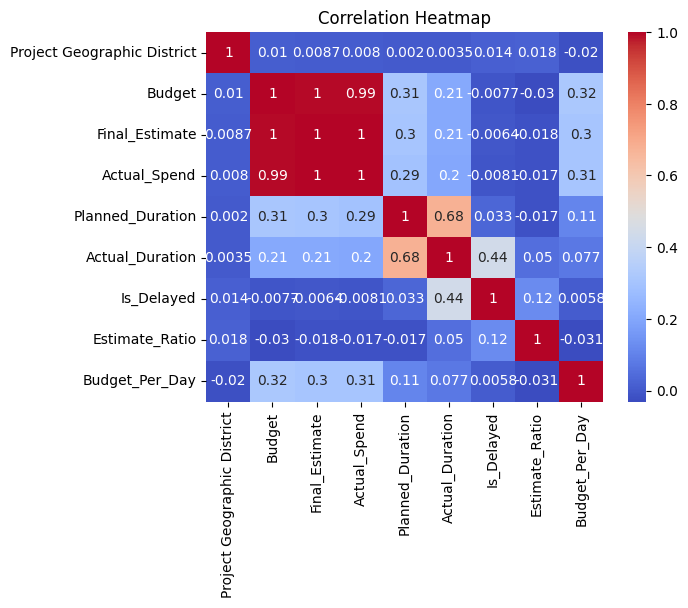

In [1259]:
numeric_df = df_new.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [1260]:
df_new.shape

(3551, 19)

In [1261]:
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)

In [1262]:
df_new.fillna(df_new.median(numeric_only=True), inplace=True)

### Feature Engineering

In [1263]:
# Selecting the features and target

selected_columns = [
    'Project Type',
    'Project Phase Name',
    'Estimate_Ratio',   
    'Budget',
    'Planned_Duration',
    'Is_Delayed',
    'Project Start_Month'
]

df_fe = df_new[selected_columns].dropna()

In [1264]:
df_encoded = pd.get_dummies(df_fe, columns=[
    'Project Type',
    'Project Start_Month',
    'Project Phase Name'
], drop_first=True)


In [1265]:
# Model selection and data preparation
# Defining X and y
X = df_encoded.drop(columns='Is_Delayed')
y = df_encoded['Is_Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1266]:
X_train.head()

,Estimate_Ratio,Budget,Planned_Duration,Project Type_PRE-K,Project Type_SCA CIP,Project Type_SCA CIP RESOA,Project Type_SCA Capacity,Project Type_SCA Emergency Lighting,Project Type_SCA Lease Site Improvement,Project Start_Month_August,...,Project Start_Month_June,Project Start_Month_March,Project Start_Month_May,Project Start_Month_November,Project Start_Month_October,Project Start_Month_September,"Project Phase Name_CM,F&E",Project Phase Name_Construction,Project Phase Name_Design,Project Phase Name_Scope
2973,0.010388,80768.0,137,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
497,0.128518,85062.0,152,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1293,0.816035,1282250.0,169,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7935,1.205815,58883.0,156,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5319,1.000000,0.0,90,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [1267]:
X_test.head()

,Estimate_Ratio,Budget,Planned_Duration,Project Type_PRE-K,Project Type_SCA CIP,Project Type_SCA CIP RESOA,Project Type_SCA Capacity,Project Type_SCA Emergency Lighting,Project Type_SCA Lease Site Improvement,Project Start_Month_August,...,Project Start_Month_June,Project Start_Month_March,Project Start_Month_May,Project Start_Month_November,Project Start_Month_October,Project Start_Month_September,"Project Phase Name_CM,F&E",Project Phase Name_Construction,Project Phase Name_Design,Project Phase Name_Scope
764,1.000000,0.0,122,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2608,0.734994,155400.0,137,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5972,1.000000,0.0,124,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1835,2.678403,11900.0,870,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3116,2.977523,21800.0,91,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [1268]:
# Standardizing the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1269]:
## Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}   

In [1270]:
X_train.head()

,Estimate_Ratio,Budget,Planned_Duration,Project Type_PRE-K,Project Type_SCA CIP,Project Type_SCA CIP RESOA,Project Type_SCA Capacity,Project Type_SCA Emergency Lighting,Project Type_SCA Lease Site Improvement,Project Start_Month_August,...,Project Start_Month_June,Project Start_Month_March,Project Start_Month_May,Project Start_Month_November,Project Start_Month_October,Project Start_Month_September,"Project Phase Name_CM,F&E",Project Phase Name_Construction,Project Phase Name_Design,Project Phase Name_Scope
2973,0.010388,80768.0,137,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
497,0.128518,85062.0,152,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1293,0.816035,1282250.0,169,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7935,1.205815,58883.0,156,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5319,1.000000,0.0,90,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [1271]:
# Initialize and train the model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5007032348804501
Confusion Matrix:
 [[  8 351]
 [  4 348]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.02      0.04       359
           1       0.50      0.99      0.66       352

    accuracy                           0.50       711
   macro avg       0.58      0.51      0.35       711
weighted avg       0.58      0.50      0.35       711



In [1272]:
for name, model in models.items():
    print(f"🔍 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("🧾 Classification Report:\n", classification_report(y_test, y_pred))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

🔍 Training: Logistic Regression
✅ Accuracy: 0.5035161744022504
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       359
           1       0.00      0.00      0.00       352

    accuracy                           0.50       711
   macro avg       0.25      0.50      0.33       711
weighted avg       0.25      0.50      0.34       711

📊 Confusion Matrix:
 [[358   1]
 [352   0]]
--------------------------------------------------
🔍 Training: Random Forest
✅ Accuracy: 0.729957805907173
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       359
           1       0.71      0.77      0.74       352

    accuracy                           0.73       711
   macro avg       0.73      0.73      0.73       711
weighted avg       0.73      0.73      0.73       711

📊 Confusion Matrix:
 [[247 112]
 [ 80 272]]
------------------------------------

C:\Users\deela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:43:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7313642756680732
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72       359
           1       0.71      0.76      0.74       352

    accuracy                           0.73       711
   macro avg       0.73      0.73      0.73       711
weighted avg       0.73      0.73      0.73       711

📊 Confusion Matrix:
 [[251 108]
 [ 83 269]]
--------------------------------------------------


In [1273]:
# Dictionary to store model accuracies
model_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc

# Print all accuracies after training
print("📊 Model Accuracy Comparison:")
for name, acc in model_accuracies.items():
    print(f"{name}: {acc:.4f}")


C:\Users\deela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:43:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Model Accuracy Comparison:
Logistic Regression: 0.5035
Random Forest: 0.7300
XGBoost: 0.7314


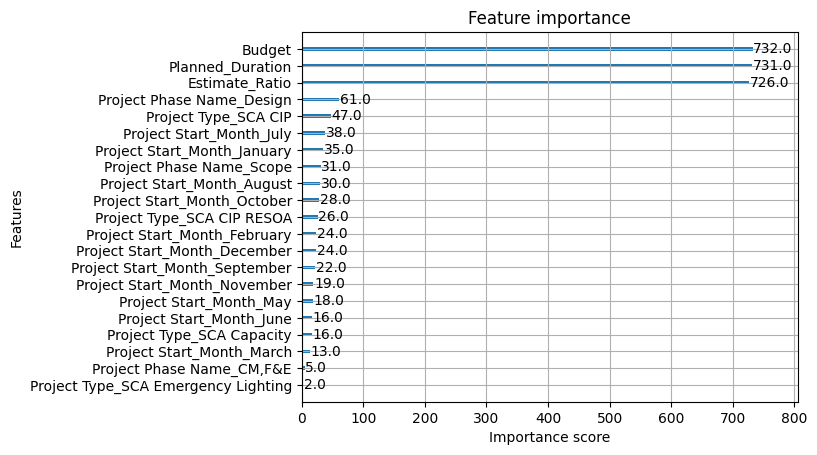

In [1274]:
from xgboost import plot_importance
plot_importance(models['XGBoost'])
plt.show()


In [1275]:
df_fe.to_csv('cleaned_construction_data.csv', index=False)
